# Training PAL Algorithm

Set algorithm parameters

In [1]:
algorithm = 'PAL' # 'PAL' or 'MAL'

# maze parameters
maze_width = 101
maze_height = 51

# agent parameters
gamma = 0.995 # discount factor to compute expected cumulative reward
alpha = 0.01 # learning rate for policy improvment

# training parameters
n_environments = 2 # number of different environments to train on
max_iterations_per_environment = 10
n_episodes_per_iteration = 3 # number of episodes to run for each epoch
max_epochs_per_episode = 60#00
learning_rate = 0.1
epsilon = 0.1 # epsilon for epsilon-greedy policy

Start training

In [2]:
from src.train import main

main(
    algorithm=algorithm,
    learning_rate=learning_rate, 
    n_environments=n_environments,
    max_iterations_per_environment=max_iterations_per_environment,
    n_episodes_per_iteration=n_episodes_per_iteration, 
    max_epochs_per_episode=max_epochs_per_episode, 
    maze_width=maze_width, 
    maze_height=maze_height, 
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    verbose=False
)

pygame 2.1.0 (SDL 2.0.16, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
Training started

Training on environment 1/2

Training on environment 2/2
End training after 6.639394521713257 seconds


Plot metrics

In [15]:
import matplotlib.pyplot as plt

def plot_metrics(mse, cost_function, algorithm, i):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    ax[0].plot(mse)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('MSE')
    ax[0].set_title(f'MSE for {algorithm} for environment {i}')

    ax[1].plot(cost_function, 'r')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Cost function')
    ax[1].set_title(f'Cost function for {algorithm} for environment {i}')

    plt.show()

No metrics to plot for environment 1 only ine iteration done
MSE: [-5.980050000000001e-05]
Cost function: [-28.998659087846647]


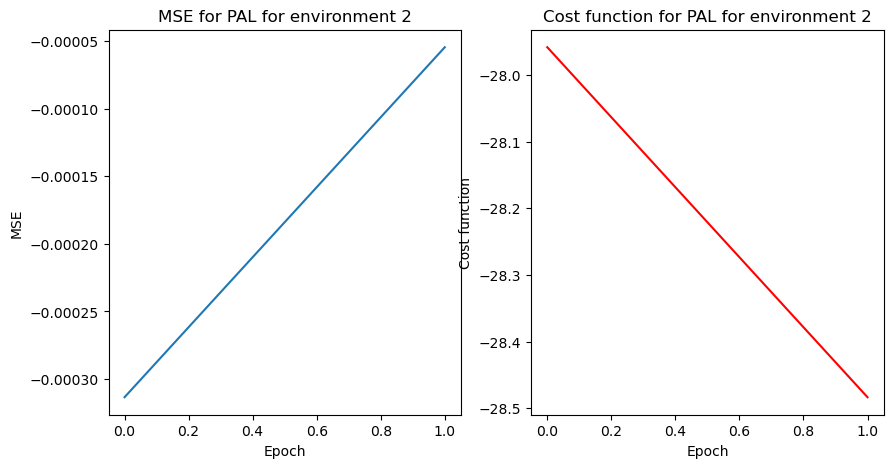

In [16]:
import json
FOLDER = 'training_parameters/PAL/metrics'


for i in range(n_environments):
    PATH = FOLDER + '/metrics_env_' + str(i+1) + '.json'
    with open(PATH, 'r') as f:
        metrics = json.load(f)
    mse = metrics['mse']
    cost_function = metrics['cost_function']
    if len(mse) > 1:
        plot_metrics(mse, cost_function, algorithm, i+1)
    else:
        print(f'No metrics to plot for environment {i+1} only ine iteration done')
        print('MSE:', mse)
        print('Cost function:', cost_function)
